In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [2]:
nd_benchmarks = {}
for name in ["literature_nd","random_nd"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    nd_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [3]:
tool_set = ["yes.seminator#def","yes.seminator-1-1","yes.seminator-1-2","yes.owl#best","no.owl#best"]

For each benchmark, we list the cumulative numbers of states for each tool. `yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`). `best` means that we choose the best variant for Owl, `#def` is the default setting of Seminator 2. `-1-1` and `-1-2` indicate older version numbers of `seminator`. If you want to see numbers where Spot's simplifications were disabled (not run for Owl), or the numbers for Owl without the _best-for-Owl_ approach, set tool_set to `None`. If you do, the `#a` stands for `ltl2ldgba -a` and analogously for `#s`. For `seminator`, by `#tba` (and analogies) we denote `seminator --via-tba` etc.

In [4]:
gather_cumulative(nd_benchmarks, tool_set=tool_set)

,literature_nd,random_nd
tool,,
no.owl#best,281,5041
yes.owl#best,234,4153
yes.seminator#def,230,3963
yes.seminator-1-1,297,7024
yes.seminator-1-2,238,4532


### Minimal automata

The follwing table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [5]:
gather_mins(nd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The older versions of Seminator reached the 30s timeout in one case for formulae from literature. Otherwise, most of the execution times were below 1s for all tools.

In [6]:
for name, b in nd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max().loc[tool_set])

literature_nd


,timeout,parse error,incorrect,crash,no output
yes.seminator-1-1,1,0,0,0,0
yes.seminator-1-2,1,0,0,0,0


tool
yes.seminator#def     0.076844
yes.seminator-1-1    30.003500
yes.seminator-1-2    30.000500
yes.owl#best          0.098299
no.owl#best           0.069296
dtype: float64

random_nd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
yes.seminator#def    0.288713
yes.seminator-1-1    5.685760
yes.seminator-1-2    0.450692
yes.owl#best         0.261014
no.owl#best          0.230413
dtype: float64

### Scatter plots
We offer 2 interactive scatter plots that show how Seminator 2 compares to Owl (In[10]), and Seminator 1.2 (In[11]).

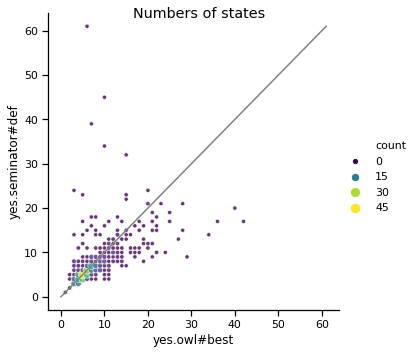

In [7]:
b = nd_benchmarks["random_nd"]
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

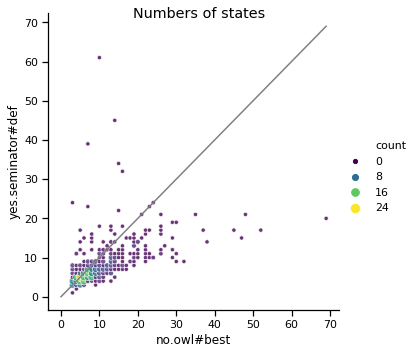

In [10]:
b = nd_benchmarks["random_nd"]
b.seaborn_scatter_plot("no.owl#best","yes.seminator#def", include_equal=True)

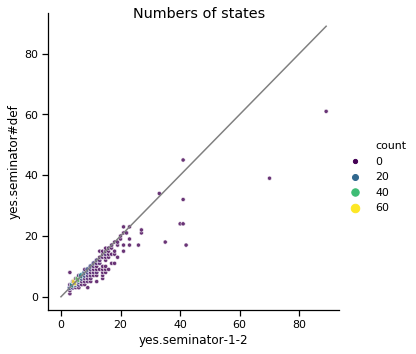

In [8]:
b.seaborn_scatter_plot("yes.seminator-1-2","yes.seminator#def", include_equal=True)

### Cross-comparison
The cross-comparison for a benchmark shows, in a cell (`row`,`column`) in how many cases the tool in `row` produces automaton that is better thatn the one produced by `column`. The last columns (`V`) summs the numbers across rows, while the green highlighting fill a space that is proportional to how well the tool in `row` competed agains `column` (proportional across columns).

In [9]:
for n, b in nd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,12,8,12,16,48
yes.seminator-1-1,7,nan,0,3,13,23
yes.seminator-1-2,10,9,nan,10,15,44
yes.owl#best,8,16,9,nan,20,53
no.owl#best,4,7,5,0,nan,16


random_nd


,yes.seminator#def,yes.seminator-1-1,yes.seminator-1-2,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,426,252,316,394,1388
yes.seminator-1-1,45,nan,24,128,223,420
yes.seminator-1-2,149,327,nan,288,362,1126
yes.owl#best,164,363,201,nan,486,1214
no.owl#best,103,275,137,0,nan,515
